1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

- Tabla de contingencia:

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import skew
import scipy.stats as st
import matplotlib.pyplot as plt

La base de datos que hemos seleccionado es el dataset de Sephora, dejamos el link a mano para poder consultar las descripciones de las columnas
https://www.kaggle.com/datasets/raghadalharbi/all-products-available-on-sephora-website?resource=download

In [4]:
df = pd.read_csv('../datos/sephora_website_dataset.csv') 

In [5]:
#Exploramos el df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [6]:
# Para poder hacer la tabla de contingencia con más sentido para los datos que tenemos creamos una función para determinar una etiqueta al producto según su precio
def cambiar_precio(col):
    if col <= 25:
        return "bajo"
    elif col > 25 and col <= 100:
        return "medio"
    else:
        return "alto"


In [7]:
# Aplicamos la función a nuestra columna creando la columna rango_precio según si es bajo, medio o alto
df["rango_precio"] = df["price"].apply(cambiar_precio)

In [8]:
df_crosstab = pd.crosstab(df['brand'], # creamos la tabla de contigencia para marca y rango de precio
                        df['rango_precio'], margins = True) # para sacar los totales
                         
df_crosstab

rango_precio,alto,bajo,medio,All
brand,,,,
8Greens,0,2,1,3
AERIN,14,1,7,22
ALTERNA Haircare,0,5,37,42
AMOREPACIFIC,11,4,18,33
Acqua Di Parma,25,0,10,35
...,...,...,...,...
stila,0,6,1,7
surratt beauty,3,4,18,25
tarte,2,101,67,170


Según la tabla de contigencia donde vemos el rango de precio por marca podemos que la tienda está enfocada a la venta de productosd de gama media-alta, eentre los 25 y los 100 euros. Gracias a la tabla de contingencia podríamos ver las marcas que están dirigidas a que público, por ejemplo la marca 'AERIN' podemos considerarla una marca de lujo y en cambio la marca 'stila' está dirigida a un público con menor poder adquisitivo

- Coeficiente de correlación de las variables numéricas del dataset.

In [9]:
correlacion = df.corr()
correlacion

/tmp/ipykernel_3925/2499073615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
id,1.000000,-0.176684,-0.175482,-0.104208,-0.026661,-0.004168,0.283722,0.153745,0.199285,0.200357,-0.008607
rating,-0.176684,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,-0.175482,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742
love,-0.104208,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879
price,-0.026661,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679
value_price,-0.004168,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874
MarketingFlags,0.283722,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908
online_only,0.153745,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023
exclusive,0.199285,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814
limited_edition,0.200357,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129


/tmp/ipykernel_3925/2670095372.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


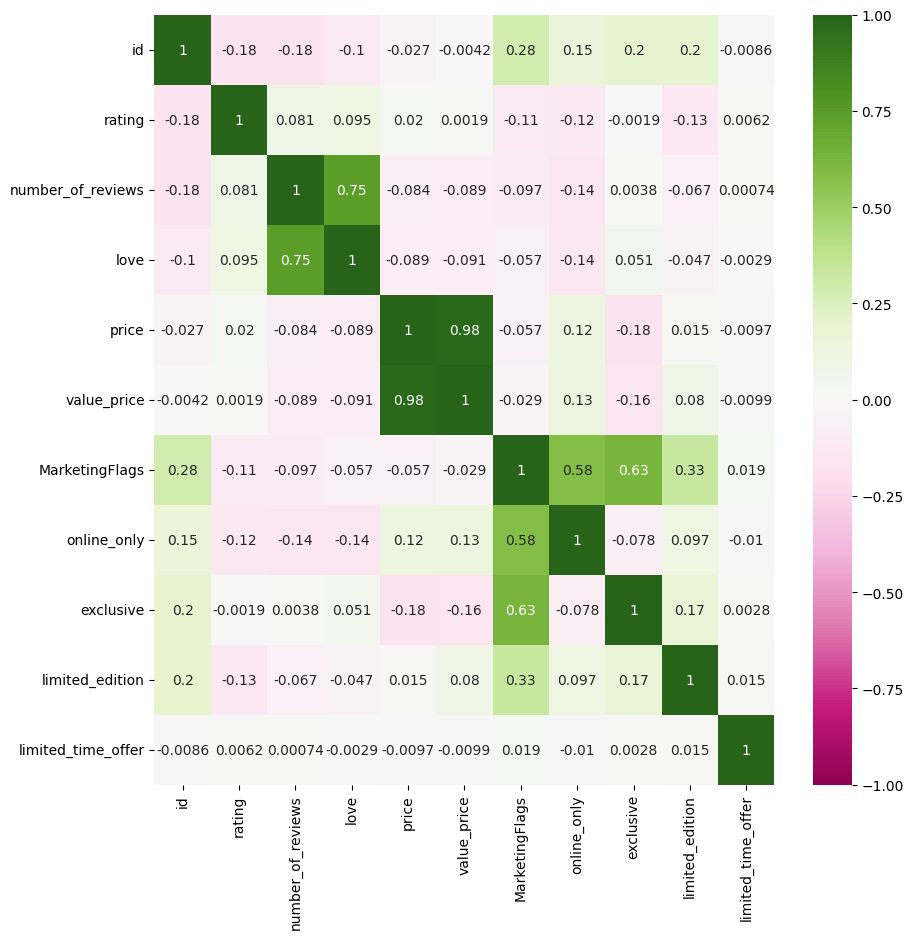

In [10]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(),
            cmap = "PiYG", 
            annot = True,
            vmin = -1, # establecemos el valor mínimo de la escala de color
            vmax = 1 # establecemos el valor máximo de la escala de color
);

Para poder hacer un análisis más sencillo hacemos un heatplot de la tabla de correlación donde podemos ver que hay muy poca correlación entre las variables numéricas de nuestro dataset. Las únicas variables que tienen correlación positiva son el valor y el precio que tienen una correlación casi perfecta, esto se debe a que el precio está calculado en base al valor una vez aplicados decuentos. 

Por otro lado podemos ver que el número de me gustas tiene una correlación bastante alta con el número de reviews, esto es de esperar ya que cuantas más reviews tenga un prodcuto más probable es que la gente lo visite y pueda añadirlo a su lista de favoritos basandonos en esas reviews ya que generan más interés en los posibles compradores.

La correlación entre MarketingFlags y exclusive y online_only es debido a que MarketingFlags indica si los productos son exclusivos o vendidos solo online.

- Sesgos de alguna de las variables numéricas del dataset.

In [11]:
sesgo_precio = skew(df['price']) # sesgo para la variable precio
print(f"El valor del sesgo para la variable price es: {sesgo_precio}")

El valor del sesgo para la variable price es: 3.1722892366379725


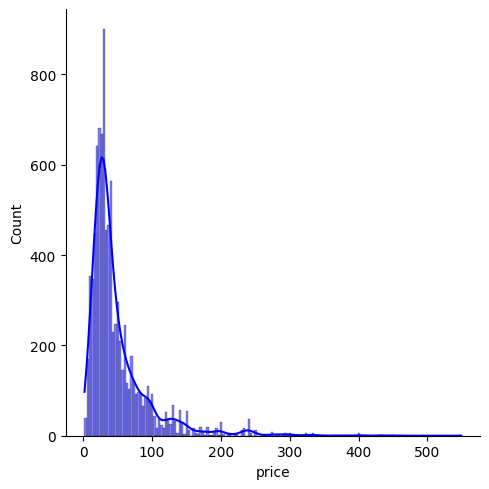

In [12]:
sns.displot(df["price"], 
            color = "blue", 
            kde = True);

Según el valor del sesgo (postivo) y el histograma podemos ver que la variable precio está sesgada a la derecha, la mayoría de los datos se encuentran entre los precios 0 y 100  pero hay outliers hasta los 500 euros. Esto se debe a que como hemos podido ver anteriormente la tienda Sephora enfoca sus productos hacia una gama media-alta de productos entre los 20 y 100 euros, pero podemos encontrar ciertos productos de alta gama por encima de estos precios

In [13]:
sesgo_rating= skew(df['rating']) #sesgo para la variable rating
print(f"El valor del sesgo para la variable price es: {sesgo_rating}")

El valor del sesgo para la variable price es: -2.7388296991585395


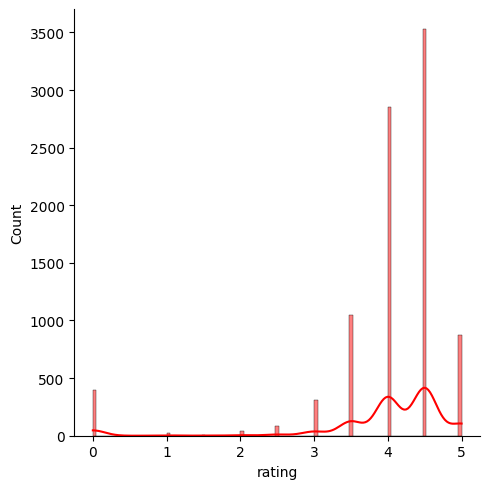

In [14]:
sns.displot(df["rating"], 
            color = "red", 
            kde = True);

Según el valor del sesgo (negativo) y el histograma podemos ver que la variable rating está sesgada a la izquierda, la mayoría de los datos se encuentran entre los ratings de 3 y 5 pero hay outliers de productos con valoración 0 por no estar valorados. Con esto podemos determinar que en terminos generales los productos vendidos en la web de Sephora son de una calidad alta o al menos cumplen las expectativas de compra de sus clientes y por ello tienen tan buenas reseñas.

- Intervalo de confianza de algunas de las variables numéricas del datase


In [15]:
datos_valor = df['value_price'] #Intervalo de confianza para value_price al 95 %
print(st.t.interval(alpha=0.95, df=len(datos_valor)-1, loc=np.mean(datos_valor), scale=st.sem(datos_valor)))
print(np.mean(datos_valor))

(50.81104626819612, 52.83613305117561)
51.823589659685865


/tmp/ipykernel_3925/2782179084.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos_valor)-1, loc=np.mean(datos_valor), scale=st.sem(datos_valor)))


Con este intervalo de confianza podríamos decir que con un 95% de probabilidad los valores de los productos se encuentran entre los 50.81 y los 52.83 euros.

In [16]:
datos_rating = df['rating'] #Intervalo de confianza para rating al 90 %
print(st.t.interval(alpha=0.90, df=len(datos_rating)-1, loc=np.mean(datos_rating), scale=st.sem(datos_rating)))
print(np.mean(datos_rating))

(3.972706808573262, 4.007332458442445)
3.9900196335078535


/tmp/ipykernel_3925/940189050.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.90, df=len(datos_rating)-1, loc=np.mean(datos_rating), scale=st.sem(datos_rating)))


Con este intervalo de confianza podríamos decir que con un 90% de probabilidad las valoraciones de los productos se encuentran entre los 3.92 y los 4.00 puntos sobre 5.